In [1]:
!pip install YOLO

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.2/56.2 kB 2.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 16.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 139.3/139.3 kB 20.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.2/12.2 MB 52.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 122.5/122.5 kB 18.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 117.8/117.8 kB 17.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 548.2/548.2 kB 50.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.2/82.2 kB 13.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 526.7/526.7 kB 58.2 MB/s eta 0:00:00
  Attempting uninstall: keyring
    Found existing installation: keyring 23.5.0
    Uninstalling keyring-23.5.0:
      Successfully uninstalled keyring-23.5.0
  Attempting uninstall: rsa
    Found existing installation: rsa 4.9
    Uninstalling rsa-4.9:
      Succ

In [8]:
!pip install ultralytics

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 757.0/757.0 kB 8.6 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl (196.0 MB)
  Using cached nvidia_nccl_cu12-2.19.3-py3-none-manylinux1_x86_64.whl (166.0 MB)
  Using cached nvidia_nvtx_cu12-12.1.105-py3-none-many

In [10]:
!pip install easyocr

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.9/2.9 MB 13.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 908.3/908.3 kB 21.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 307.2/307.2 kB 19.3 MB/s eta 0:00:00



0: 416x640 5 cars, 12.4ms
Speed: 2.6ms preprocess, 12.4ms inference, 1.7ms postprocess per image at shape (1, 3, 416, 640)

0: 416x640 1 alpaca, 7.9ms
Speed: 2.2ms preprocess, 7.9ms inference, 1.2ms postprocess per image at shape (1, 3, 416, 640)


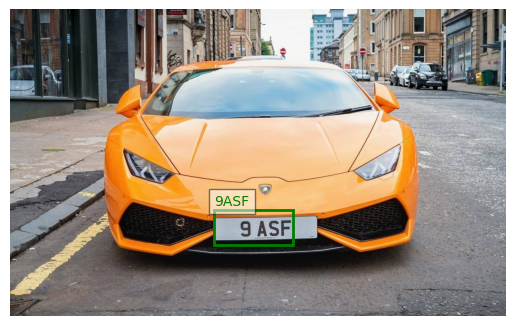

License plate text: 9ASF
License plate bounding box: [493.3179016113281, 483.8814697265625, 685.2122192382812, 570.5697631835938]


In [26]:
import os
from ultralytics import YOLO
import cv2
import easyocr
import matplotlib.pyplot as plt
import numpy as np

# Load models
coco_model = YOLO('yolov8n.pt')  # Your vehicle detection model
license_plate_detector = YOLO('/content/licenceplate_detctor_model.pt')  # Your license plate detection model

# Initialize EasyOCR readers with different models/languages
reader_easyocr_en = easyocr.Reader(['en'])
reader_easyocr_fr = easyocr.Reader(['fr'])
readers = [reader_easyocr_en, reader_easyocr_fr]

def ensemble_ocr(image, readers):
    # Perform OCR using multiple OCR models
    ocr_results = []
    for reader in readers:
        try:
            results = reader.readtext(image)
            ocr_results.append(results)
        except Exception as e:
            print(f"Error in OCR with {reader}: {e}")

    return ocr_results

def extract_license_plate_number(image_path):
    """
    Extracts the license plate number from an image using ensemble OCR.

    Args:
        image_path: Path to the image file.

    Returns:
        A dictionary containing the license plate text and bounding box, or None if not found.
    """

    image = cv2.imread(image_path)
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    # Detect vehicles
    detections = coco_model(image)[0]
    vehicles = [2, 3, 5, 7]  # Class IDs for vehicles
    for detection in detections.boxes.data.tolist():
        x1, y1, x2, y2, score, class_id = detection
        if int(class_id) in vehicles:
            # Detect license plates
            license_plates = license_plate_detector(image)[0]
            for license_plate in license_plates.boxes.data.tolist():
                x1, y1, x2, y2, score, class_id = license_plate

                # Crop license plate
                license_plate_crop = image[int(y1):int(y2), int(x1): int(x2), :]

                # Read license plate text using ensemble OCR
                ocr_results = ensemble_ocr(license_plate_crop, readers)

                for reader_results in ocr_results:
                    for result in reader_results:
                        text, confidence = result[1], result[2]
                        if confidence >= 0.5:  # Adjust confidence threshold as needed
                            # Draw bounding box
                            rect = plt.Rectangle((x1, y1), x2 - x1, y2 - y1, linewidth=2, edgecolor='g', facecolor='none')
                            plt.gca().add_patch(rect)
                            # Add text
                            plt.text(x1, y1 - 10, text, fontsize=10, color='g', bbox={'facecolor': 'white', 'alpha': 0.5})
                            # Display the image
                            plt.imshow(image_rgb)
                            plt.axis('off')
                            plt.show()
                            return {'text': text, 'bbox': [x1, y1, x2, y2]}

    # Display the image if no license plate is found
    plt.imshow(image_rgb)
    plt.axis('off')
    plt.show()
    print("No license plate detected.")

# Example usage:
image_path = "/content/whose-number-plate-is-this.jpg"
result = extract_license_plate_number(image_path)

if result:
    print(f"License plate text: {result['text']}")
    print(f"License plate bounding box: {result['bbox']}")
else:
    print("No license plate detected.")